<a href="https://colab.research.google.com/github/zgbl/WeiqiBoardDetect/blob/main/notebooks/BoardDetect2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.font_manager as fm

In [2]:
# Âä†ËΩΩÂõæÂÉè
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.imread("go_board.jpg")  # Êç¢Êàê‰Ω†Ëá™Â∑±ÁöÑÂõæÂÉèË∑ØÂæÑ
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Saving Pic1.jpg to Pic1.jpg


In [3]:
# ËæπÁºòÊ£ÄÊµã
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

In [5]:
# ÊâæËΩÆÂªì
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
# ÊâæÊúÄÂ§ßÁöÑËΩÆÂªìÔºàÂÅáËÆæÊòØÊ£ãÁõòÔºâ
contour = max(contours, key=cv2.contourArea)

In [8]:
# Â§öËæπÂΩ¢ÈÄºËøë
epsilon = 0.02 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)

In [10]:
# ÊèêÂèñÂõõËßíÁÇπ
print("approx is:", approx)
if len(approx) == 4:
    pts_src = approx.reshape(4, 2).astype("float32")

    # ÊéíÂ∫èÔºöÂ∑¶‰∏ä„ÄÅÂè≥‰∏ä„ÄÅÂè≥‰∏ã„ÄÅÂ∑¶‰∏ã
    def order_points(pts):
        rect = np.zeros((4, 2), dtype="float32")
        s = pts.sum(axis=1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        diff = np.diff(pts, axis=1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
        return rect

    pts_src = order_points(pts_src)

    # ÁîªÂá∫Êù•Á°ÆËÆ§
    for pt in pts_src:
        cv2.circle(image, tuple(pt.astype(int)), 10, (0, 0, 255), -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Chessboard Corners")
    plt.axis("off")
    plt.show()

else:
    print("‚ùå Ê≤°ÊúâÊ£ÄÊµãÂà∞ÊÅ∞Â•ΩÂõõ‰∏™ËßíÁÇπÔºåËØ∑Ë∞ÉÊï¥ËΩÆÂªìÊ£ÄÊµãÂèÇÊï∞")

approx is: [[[ 17  14]]

 [[299  16]]

 [[ 71 190]]

 [[296 295]]

 [[194 123]]

 [[313 202]]

 [[299  15]]]
‚ùå Ê≤°ÊúâÊ£ÄÊµãÂà∞ÊÅ∞Â•ΩÂõõ‰∏™ËßíÁÇπÔºåËØ∑Ë∞ÉÊï¥ËΩÆÂªìÊ£ÄÊµãÂèÇÊï∞


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22280 (\N{CJK UNIFIED IDEOGRAPH-5708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


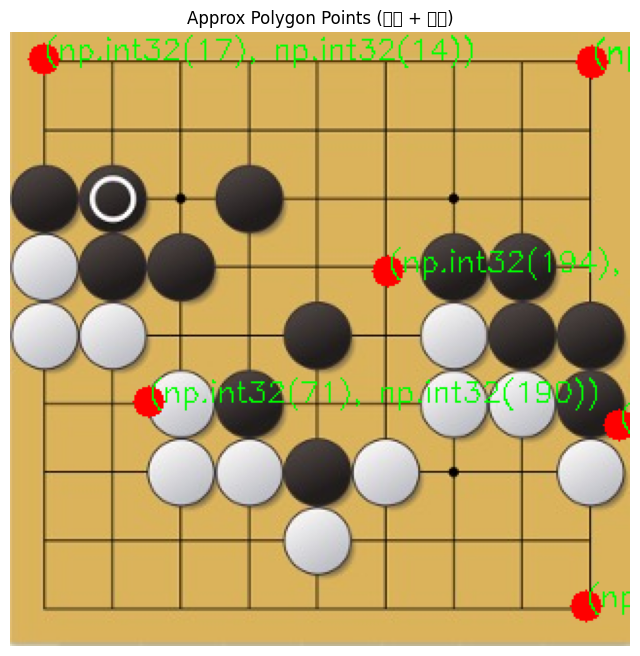

In [11]:
img_draw = img.copy()
for pt in approx:
    pt = tuple(pt[0])  # ÂèñÂá∫ÂùêÊ†á
    cv2.circle(img_draw, pt, 8, (0, 0, 255), -1)
    cv2.putText(img_draw, str(pt), pt, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.title("Approx Polygon Points (Á∫¢Âúà + ÂùêÊ†á)")
plt.axis("off")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36873 (\N{CJK UNIFIED IDEOGRAPH-9009}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

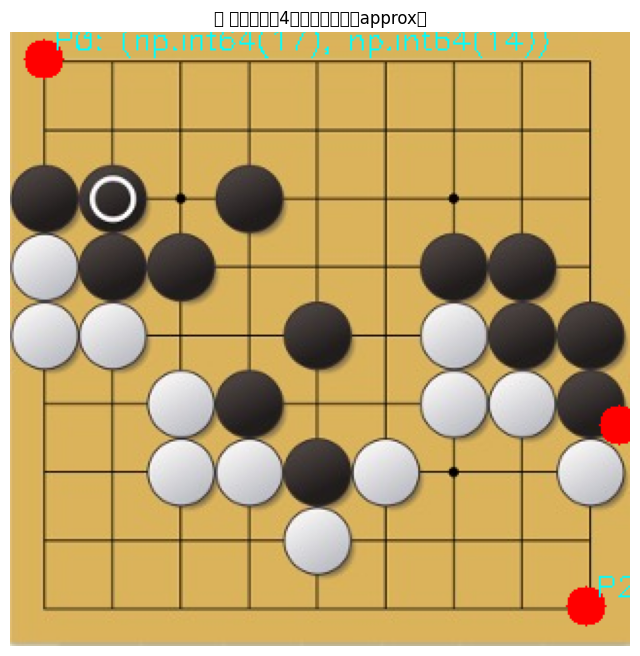

In [12]:
# ÂÅáËÆæ approx Â∑≤ÁªèÊòØ‰ªéËΩÆÂªì‰∏≠ÊèêÂèñÂá∫Êù•ÁöÑ N x 1 x 2 ÂΩ¢Áä∂
pts = approx.reshape(-1, 2)  # Âèò‰∏∫ N x 2 ÂùêÊ†áÂàóË°®

# Âõõ‰∏™ÂÖ≥ÈîÆÁÇπÔºà‰ΩøÁî®Ê®™ÂùêÊ†á‰∏éÂíåÁöÑÊûÅÂÄºÊù•Ëøë‰ººÂõõËßíÔºâ
leftmost = pts[np.argmin(pts[:, 0])]
rightmost = pts[np.argmax(pts[:, 0])]
topleft = pts[np.argmin(pts.sum(axis=1))]
bottomright = pts[np.argmax(pts.sum(axis=1))]

# ÁªÑÂêàÊàêËßíÁÇπÔºàÊåâÔºöÂ∑¶‰∏äÔºåÂè≥‰∏äÔºåÂè≥‰∏ãÔºåÂ∑¶‰∏ãÔºâ
pts_src = np.array([topleft, rightmost, bottomright, leftmost], dtype="float32")

# Âú®ÂéüÂõæ‰∏äÁîªÂá∫Ëøô‰∫õÁÇπ
image_marked = img.copy()
for i, pt in enumerate(pts_src):
    pt_int = tuple(pt.astype(int))
    cv2.circle(image_marked, pt_int, 10, (0, 0, 255), -1)
    cv2.putText(image_marked, f"P{i}: {pt_int}", (pt_int[0] + 5, pt_int[1] - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

# ÊòæÁ§∫ÂõæÂÉè
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.title("üî¥ Ëá™Âä®ÈÄâÂèñÁöÑ4‰∏™ËßíÁÇπÔºàÊù•Ê∫ê‰∫éapproxÔºâ")
plt.axis("off")
plt.show()